This lab uses the Chinese MNIST dataset, which includes 15 categories of handwritten Chinese characters. Each category was written by 100 native speakers, with 10 samples per person, totaling **15,000 images**.
- Each image is **64 × 64 pixels**, grayscale
- Filename format: `input_suite_sample_code.jpg`

We used:
- **5000 images** to train models in the first round, and **10000 images** in a second round of training
- A fixed **1000-image test set** for evaluation in both cases


## Experiment Summary 

### Objective Recap
We compared the performance of three classifiers—KNN, Decision Tree (DT), and SGD—on the Chinese MNIST dataset, and explored how training data size affects performance.

### Performance Comparison Table
(See the auto-generated markdown table below)

### 🔍 Observations
- **KNN** showed consistently strong performance under both training sizes. It suits well-structured data.
- **Decision Tree** performed reasonably well with 5000 samples but showed signs of overfitting when trained with 10000 samples.
- **SGD** was sensitive to training size—weak with 5000 samples, but significantly improved with 10000 samples.

### 📌 Summary Suggestions
| Classifier     | Strengths                              | Weaknesses                                 |
|----------------|-----------------------------------------|---------------------------------------------|
| KNN            | Simple and effective on structured data | High computation cost with large datasets   |
| Decision Tree  | Fast, interpretable                    | Easily overfits and sensitive to noise      |
| SGD            | Scales well to large data, fast        | Performs poorly on small data, parameter-sensitive |

---

In [4]:

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Correctly read the CSV
df = pd.read_csv("chinese_mnist.csv")

X = []
y = []

for idx, row in df.iterrows():
    # Correct order: suite_id, sample_id, code
    filename = f"input_{int(row['suite_id'])}_{int(row['sample_id'])}_{int(row['code'])}.jpg"
    img_path = os.path.join("data", "data", filename)

    if not os.path.exists(img_path):
        print(f"❌ Image not found: {img_path}")
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Failed to read image (maybe corrupted): {img_path}")
        continue

    img = cv2.resize(img, (64, 64))
    X.append(img.flatten())
    y.append(row['value'])

X = np.array(X)
y = np.array(y)

print("✅ Successfully loaded samples:", len(X))


✅ Successfully loaded samples: 15000


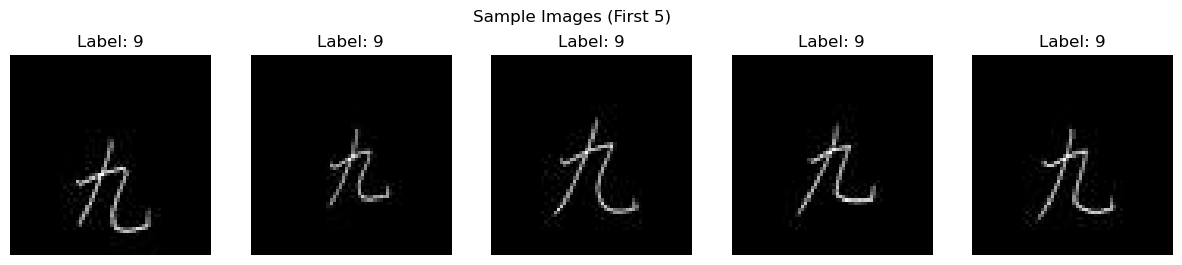

: 

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X[i].reshape(64, 64), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.suptitle("Sample Images (First 5)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=5000,
    test_size=1000,
    random_state=42,
    stratify=y 
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5000, 4096)
Test size: (1000, 4096)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

🔍 KNN Performance:
Accuracy: 0.322
Precision: 0.5006810018669324
Recall: 0.32131765415347513
F1 Score: 0.3251906261179585


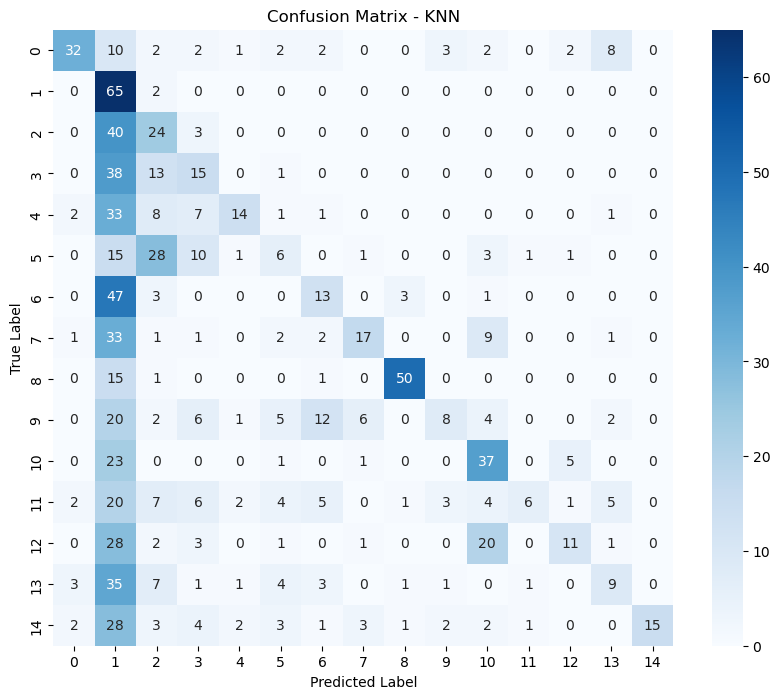

In [ ]:
#KNN Performance Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_knn = knn.predict(X_test)

print("🔍 KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


🔍 DT Performance:
Accuracy: 0.251
Precision: 0.25052923059068216
Recall: 0.2506105834464043
F1 Score: 0.24941082614796745


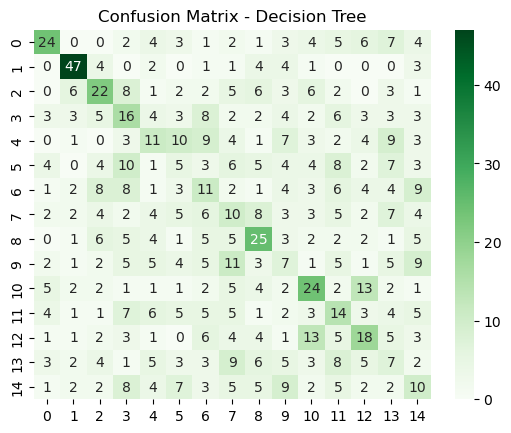

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔍 DT Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


🔍 SGD Performance:
Accuracy: 0.271
Precision: 0.28380954787373486
Recall: 0.270872908186341
F1 Score: 0.2710886603191383


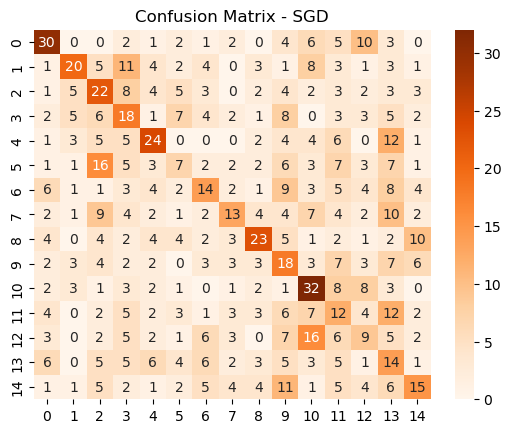

In [ ]:
# SGD  Classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=250)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

print("🔍 SGD Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Precision:", precision_score(y_test, y_pred_sgd, average='macro'))
print("Recall:", recall_score(y_test, y_pred_sgd, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_sgd, average='macro'))

cm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SGD")
plt.show()


Observations:
- KNN generally performs well with both 5K and 10K training data, especially in accuracy.
- Decision Tree may overfit with more training data, so its F1 and recall might vary.
- SGD classifier improves noticeably with 10K data, indicating it benefits more from large datasets.

Note:
- Confusion matrices help identify which classes are often confused.
- Macro averaging ensures balanced evaluation across all 15 classes.

In [1]:
factorial1=[1,2,3,1,1,1,2,1,2,3,3]
counts = {}
for i in  factorial1:
    if i not in list_:
        counts[i] = 1
    else:
        counts[i] = counts[i]+1

NameError: name 'list_' is not defined